# Explicit Description of the Marginal Value Theorem

While the biological intuition for MVT is straightforward, an explicit numerical 
description might help the reader develop a better understanding of the model

_Let us define the equation governing rate of resource consumption:_

$\dot I = r e^{-(t-T)/r} \ | \ t>T$

$\dot I = 0 \ | \ t<T$

_Note:_ Any decreasing function should do the job; except for a resource rich patch, $\ddot I$ should be lower than that for a resource poor patch

(for fun, try: $\dot I = r e^{-(t-T)}$)

$I$ is the __Net Resource Gain__ 

$r$ is __Resource Richness or Foraging Efficiency__

$T$ is __Traveling Time__

_Note:_ This is a toy model. Refer to [Charnov's original study][1] and [Parker and Stuart's superb analysis][2] of it

[1]: https://doi.org/10.1016/0040-5809(76)90040-x
[2]: https://www.jstor.org/stable/2460030

For a biological description, refer to [Begon, Townsend and Harper 4th Ed](https://www.wiley.com/en-us/Ecology%3A+From+Individuals+to+Ecosystems%2C+4th+Edition-p-9781405111171)

In [17]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [18]:
#defining parameters
r = 1
T = 3
t_max = 10

Play around with the parameters to see how $\dot I,\ I$ change as a function of time

In [19]:
def f(r,T,t):
    I_dot = r*(np.exp(-(1/r)*(t-T))) #try r*(np.exp(-(t-T)))
    I_dot[t<=T] = 0
    return I_dot

In [20]:
t = np.arange(0,t_max,1e-2)
I_dot = f(r,T,t)
df = pd.DataFrame({'I_dot':I_dot,'t':t})

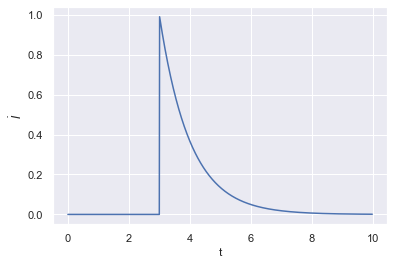

In [21]:
sns.lineplot(y ='I_dot',x = 't', data = df);
plt.ylabel('$\dot I$');

The rate of resource consumption decreases exponentially

In [22]:
#numerically integrate I_dot to get a curve for cumulative resource consumed over time
def euler(dt, t_max, I_dot):
    I = np.zeros(np.size(t))
    I_p = 0
    for inst in np.arange(0,t_max,dt):
        dI = I_dot[t==inst]*dt
        I[t==inst] = I_p + dI
        I_p = I[t==inst]
    return I

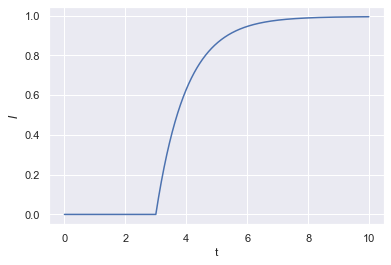

In [23]:
df['I'] = euler(1e-2,t_max,I_dot)
sns.lineplot(y ='I',x = 't', data = df);
plt.ylabel('$I$');

$I$ saturates as a function of $t$

optimal exit time =  4.76


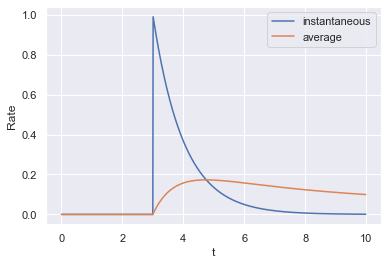

In [24]:
#to get optimal foraging time, compare average foraging rate (including traveling time) to instantaneous foraging rate
df['I/t'] = df['I']/df['t']
t_opt = df['t'][(df['I_dot']<df['I/t'].max()) & (df['t']>T)].iloc[0]

sns.lineplot(y ='I_dot',x = 't', data = df)
sns.lineplot(y ='I/t',x = 't', data = df)
plt.ylabel('Rate'); plt.legend(['instantaneous', 'average'])

print('optimal exit time = ', t_opt)

If the instantaneous rate of consumption falls below the __maximum__ average rate, the organism should ideally abandon the patch and move on to a new one (_Can you prove this analytically?_)

_Note_: Average rate is maximum when average rate and instantaneous rate intersect in the above graph. This is true when the environment has only one type of patches

In [25]:
#Now plot the line which passes through the point at which the two rates are equal:
df['optimality'] = (df['I'][df['t']>=t_opt].iloc[0])/t_opt*df['t']

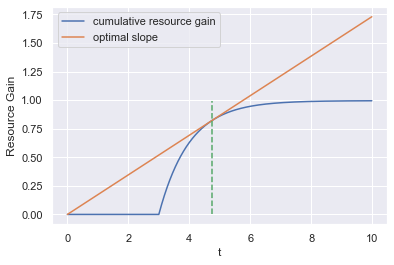

In [26]:
sns.lineplot(y ='I',x = 't', data = df)
sns.lineplot(y ='optimality',x = 't', data = df)

plt.plot([t_opt, t_opt], [0, df['I'].max()], linestyle = '--');

plt.ylabel('Resource Gain'); plt.legend(['cumulative resource gain','optimal slope']);

Note tangential behaviour! (i.e the line passing through origin and through the point on the curve corresponding to the optimal exit time is tangential to the cumulative resource gain curve)

_Can you prove this?_

## Comparing distinct environments each with a single patch type

In [27]:
#defining parameters
r_a = 1
r_b = 3 #resource rich/poor environment
T_a = 2
T_b = 4 #higher/lower traveling time
t_max = 10

In [28]:
t = np.arange(0,t_max,1e-2)
I_dot_a = f(r_a,T_a,t)
I_dot_b = f(r_b,T_b,t)
df2 = pd.DataFrame({'I_dot_a':I_dot_a, 'I_dot_b':I_dot_b, 't':t})

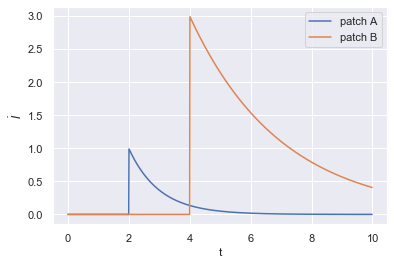

In [29]:
sns.lineplot(y ='I_dot_a',x = 't', data = df2)
sns.lineplot(y ='I_dot_b',x = 't', data = df2)
plt.ylabel('I_dot'); plt.legend(['patch A','patch B']);
plt.ylabel('$\dot I$');

Two different environments, each having a single patch type

Can you figure out which is resource poor and which is resource rich?

In [30]:
#Now numerically integrate both patches and get optimal exit times
df2['I_a'] = euler(1e-2,t_max,I_dot_a); df2['I_b'] = euler(1e-2,t_max,I_dot_b);
df2['I/t_a'] = df2['I_a']/df2['t']
df2['I/t_b'] = df2['I_b']/df2['t']
t_opt_a = df2['t'][(df2['I_dot_a']<df2['I/t_a'].max()) & (df2['t']>T_a)].iloc[0]
t_opt_b = df2['t'][(df2['I_dot_b']<df2['I/t_b'].max()) & (df2['t']>T_b)].iloc[0]

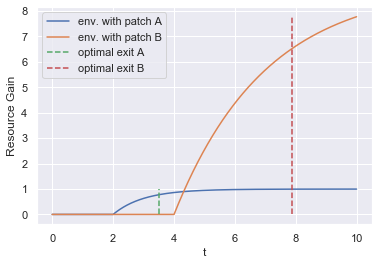

In [31]:
sns.lineplot(y ='I_a',x = 't', data = df2)
sns.lineplot(y ='I_b',x = 't', data = df2)
plt.plot([t_opt_a, t_opt_a], [0, df2['I_a'].max()], linestyle = '--')
plt.plot([t_opt_b, t_opt_b], [0, df2['I_b'].max()], linestyle = '--');
plt.ylabel('Resource Gain'); plt.legend(['env. with patch A','env. with patch B','optimal exit A', 'optimal exit B']);

__Exit time is more for resource rich environment!__

What happens for an environment in which the resources are similar but traveling time is not? (change $T$ for the above enviroments and verify for yourself)

What happens if parameter being considered is __Proportional Resource Gain__ instead of __Cumulative Resource Gain__?

$\text{Let us normalise } I \ \text{by} \ I_{max}$:

In [32]:
#Now numerically integrate both patches and get optimal exit times
df2['I_a'] = euler(1e-2,t_max,I_dot_a); df2['I_b'] = euler(1e-2,t_max,I_dot_b);
df2['I_a_norm'] = df2['I_a']/df2['I_a'].max(); df2['I_b_norm'] = df2['I_b']/df2['I_b'].max();
df2['I/t_a'] = df2['I_a']/df2['t']
df2['I/t_b'] = df2['I_b']/df2['t']
t_opt_a = df2['t'][(df2['I_dot_a']<df2['I/t_a'].max()) & (df2['t']>T_a)].iloc[0]
t_opt_b = df2['t'][(df2['I_dot_b']<df2['I/t_b'].max()) & (df2['t']>T_b)].iloc[0]

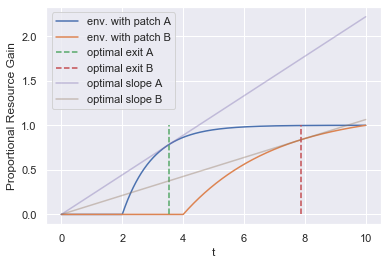

In [33]:
sns.lineplot(y ='I_a_norm',x = 't', data = df2)
sns.lineplot(y ='I_b_norm',x = 't', data = df2)
plt.plot([t_opt_a, t_opt_a], [0, df2['I_a_norm'].max()], linestyle = '--')
plt.plot([t_opt_b, t_opt_b], [0, df2['I_b_norm'].max()], linestyle = '--');

df2['optimality_a'] = (df2['I_a_norm'][df2['t']>=t_opt_a].iloc[0])/t_opt_a*df2['t']
sns.lineplot(y ='optimality_a',x = 't', data = df2, alpha = 0.4)

df2['optimality_b'] = (df2['I_b_norm'][df2['t']>=t_opt_b].iloc[0])/t_opt_b*df2['t']
sns.lineplot(y ='optimality_b',x = 't', data = df2, alpha = 0.4);

plt.ylabel('Proportional Resource Gain'); plt.legend(['env. with patch A','env. with patch B','optimal exit A', 'optimal exit B','optimal slope A','optimal slope B']);

Note that even when we look at proportional resource gain, the line that passes through the origin and the _y_ value at the optimal exit time is tangential to the proportional resource gain curve. Can you prove this?

## Single environment with distinct patch types

In the previous case, we saw what the optimal exit time should be for an animal foraging in two distinct environments, each with a single patch type. Now we will see what happens in the case of a single environment with 2 distinct patch types

In this environment, the low resource patches and the high resource patches are equally abundant:
Therefore, the average foraging rate for this environment is going to be a mean of the average foraging rate for the two different patch types

Can you show this?

_Here we consider the same parameters for patch A and patch B as in the case above_

In [34]:
df3 = df2.copy()

In [36]:
#get the average consumption rate for the habitat
df3['I/t_a'] = df3['I_a']/df3['t']
df3['I/t_b'] = df3['I_b']/df3['t']

df3['I/t'] = df3[['I/t_a', 'I/t_b']].mean(axis=1)

t_opt_a = df3['t'][(df2['I_dot_a']<df3['I/t'].max()) & (df3['t']>T_a)].iloc[0]
t_opt_b = df3['t'][(df2['I_dot_b']<df3['I/t'].max()) & (df3['t']>T_b)].iloc[0]

#get the line of optimal slope
df3['optimality'] = (df3['I/t'][df['t']>=t_opt].iloc[0])*df['t']

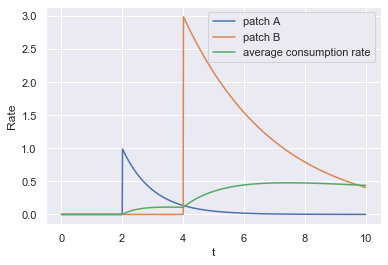

In [39]:
sns.lineplot(y ='I_dot_a',x = 't', data = df3)
sns.lineplot(y ='I_dot_b',x = 't', data = df3)
sns.lineplot(y = 'I/t', x = 't', data = df3)
plt.ylabel('I_dot'); plt.legend(['patch A','patch B','average consumption rate']);
plt.ylabel('Rate');

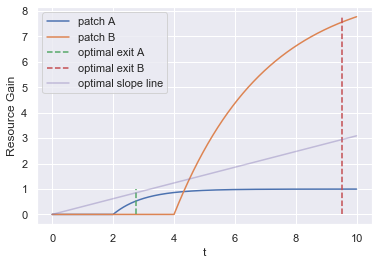

In [40]:
sns.lineplot(y ='I_a',x = 't', data = df3)
sns.lineplot(y ='I_b',x = 't', data = df3)
plt.plot([t_opt_a, t_opt_a], [0, df3['I_a'].max()], linestyle = '--')
plt.plot([t_opt_b, t_opt_b], [0, df3['I_b'].max()], linestyle = '--');
sns.lineplot(y ='optimality',x = 't', data = df3, alpha = 0.4);
plt.ylabel('Resource Gain'); plt.legend(['patch A','patch B','optimal exit A', 'optimal exit B','optimal slope line']);

__Observe the tangential behaviour!__

This can also be extended to the case where there are more than 2 patch types within a single environment